In [6]:
import pandas as pd
import numpy as np

df=pd.read_csv("insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

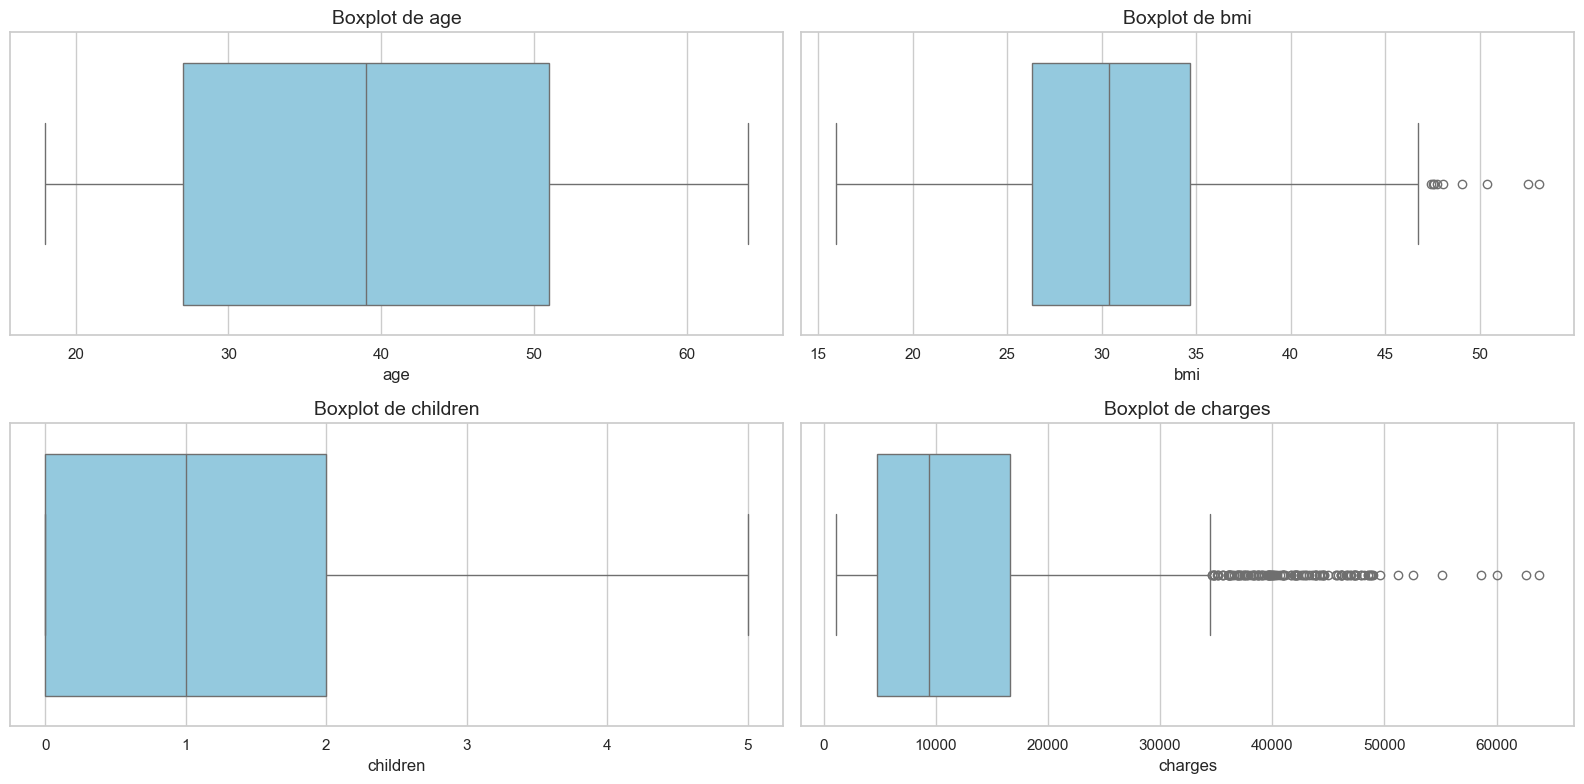

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de los gráficos
sns.set(style="whitegrid")

# Graficar boxplots para identificar outliers en las columnas numéricas
numeric_columns = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(16, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot de {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
plt.tight_layout()
plt.show()


In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separar las columnas numéricas y categóricas
categorical_columns = ['sex', 'smoker', 'region']
numeric_columns = ['age', 'bmi', 'children', 'charges']

# Imputar valores faltantes (aunque no hay en este caso, pero el pipeline lo gestiona)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputación con media
    ('scaler', StandardScaler())  # Escalado de datos
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación con moda
    ('onehot', OneHotEncoder(drop='first'))  # One-Hot Encoding sin multicolinealidad
])

# Combinar los transformadores
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_columns),
    ('cat', categorical_transformer, categorical_columns)
])

# Aplicar el preprocesamiento al dataset
preprocessed_data = preprocessor.fit_transform(df)

# Verificar el resultado del preprocesamiento
preprocessed_data.shape  # Dimensiones del dataset preprocesado


(1338, 9)

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Separar las columnas numéricas y categóricas
categorical_columns = ['sex', 'smoker', 'region']
numeric_columns = ['age', 'bmi', 'children', 'charges']

# Imputar valores faltantes y preprocesar
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_columns),
    ('cat', categorical_transformer, categorical_columns)
])

preprocessed_data = preprocessor.fit_transform(df)

# Crear variables independientes (X) y dependiente (y)
X = preprocessed_data
y = (df['smoker'] == 'yes').astype(int)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelos a implementar
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Evaluar modelos con validación cruzada
initial_scores = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    initial_scores[model_name] = scores.mean()

initial_scores


{'Logistic Regression': np.float64(1.0),
 'K-Nearest Neighbors': np.float64(0.9915887850467291),
 'Decision Tree': np.float64(1.0)}

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convertir variables categóricas a numéricas
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Dividir los datos en características y etiquetas
X = df.drop('charges', axis=1)  # Suponiendo que 'charges' es la etiqueta
y = df['charges']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


X = df.drop('charges', axis=1)  # Suponiendo que 'charges' es la etiqueta
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Implementar GridSearchCV
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test)

# 4. Implementar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)

# 5. Comparar resultados
print("Mejor puntuación GridSearchCV:", grid_search.best_score_)
print("Mejor puntuación RandomizedSearchCV:", random_search.best_score_)

# 6. Evaluar los modelos optimizados
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print(f'Mean Squared Error: {mse}')

print("Evaluación de GridSearchCV:")
evaluate_model(y_test, y_pred_grid)

print("Evaluación de RandomizedSearchCV:")
evaluate_model(y_test, y_pred_random)

# 7. Matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

print("Matriz de confusión para GridSearchCV:")
plot_confusion_matrix(y_test, y_pred_grid)

print("Matriz de confusión para RandomizedSearchCV:")
plot_confusion_matrix(y_test, y_pred_random)


Mejor puntuación GridSearchCV: -23418780.07029148
Mejor puntuación RandomizedSearchCV: -23515503.278276037
Evaluación de GridSearchCV:
Mean Squared Error: 20238565.46756311
Evaluación de RandomizedSearchCV:
Mean Squared Error: 20326485.970340125
Matriz de confusión para GridSearchCV:


ValueError: continuous is not supported

In [25]:
from sklearn.model_selection import RandomizedSearchCV

# Implementar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Mejores hiperparámetros usando RandomizedSearchCV:", random_search.best_params_)


Mejores hiperparámetros usando RandomizedSearchCV: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 30}


In [30]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_scores, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Para la curva ROC, asegurémonos de que y sea binario o convertimos a binario según un umbral
# plot_roc_curve(y_test, y_pred_grid, title='ROC Curve for GridSearchCV')
# plot_roc_curve(y_test, y_pred_random, title='ROC Curve for RandomizedSearchCV')
